In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [ ]:
df = pd.read_csv('data_q1.csv')
df.head()

,Feature 1,Feature 2,Output
0,1.5,4.97,2.2
1,2.0,4.97,2.2
2,3.0,4.97,2.2
3,4.0,4.97,2.2
4,1.5,4.97,2.2


In [ ]:
def cost(X,y,w):
  m = len(y)
  h = np.dot(X, w.T)
  J = (1/(2*m)) * np.sum((h - y) ** 2)
  return J
################################################
def bgd(X, y, w, alpha, T):
  costs = np.zeros(T)
  weights = np.zeros((T,3))
  m = len(y)
  for i in range(T):
    h = np.dot(X, w.T)
    w = w - (alpha/m)*np.dot(h-y,X)
    costs[i] = cost(X, y, w)
    weights[i, :] = w
  return costs, weights, w
################################################
def sgd(X, y, w, alpha, T):
    costs = np.zeros(T)
    weights = np.zeros((T,3))
    m = len(y)
    for i in range(T):
        rand_index = np.random.randint(m)
        ind_x = X[rand_index:rand_index+1]
        ind_y = y[rand_index:rand_index+1]
        w = w - alpha * (ind_x.T.dot(ind_x.dot(w) - ind_y))
        costs[i] = cost(ind_x,ind_y,w)
        weights[i, :] = w
    return costs, weights, w
################################################
def mbgd(X, y, w, alpha, T, batch_size):
    costs = np.zeros(T)
    weights = np.zeros((T,3))
    m = len(y)
    for i in range(T):
        rand_index = np.random.randint(m)
        ind_x = X[rand_index:rand_index+batch_size]
        ind_y = y[rand_index:rand_index+batch_size]
        w = w - (alpha/batch_size) * (ind_x.T.dot(ind_x.dot(w) - ind_y))
        costs[i] = cost(ind_x,ind_y,w)
        weights[i, :] = w
    return costs, weights, w

In [ ]:
n = 2
m = df.shape[0]
print(m)

115


In [ ]:
#removing duplicates
df = df.drop_duplicates(keep='first')
m = df.shape[0]
print(m)

55


In [ ]:
datan = df.values
X = datan[:, [0,1]]
X = (X - np.min(X, axis = 0))/(np.max(X, axis=0)-np.min(X, axis=0))
X = np.append(np.ones([m,1]), X, axis = 1)
y = datan[:, 2]
y = (y - np.min(y, axis=0))/(np.max(y, axis=0)-np.min(y, axis=0))
w = np.zeros(3)


In [ ]:
def plot_gd(costs):
  plt.title('Cost Function vs epochs')
  plt.xlabel('Iterations')
  plt.ylabel('Cost')
  plt.plot(costs)
  plt.show()

In [ ]:
costs_bgd, weights_bgd, w_bgd = bgd(X, y, w, 0.01, 1000)
costs_sgd, weights_sgd, w_sgd = sgd(X, y, w, 0.01, 500)
costs_mbgd, weights_mbgd, w_mbgd = mbgd(X, y, w, 0.004, 500, 30)

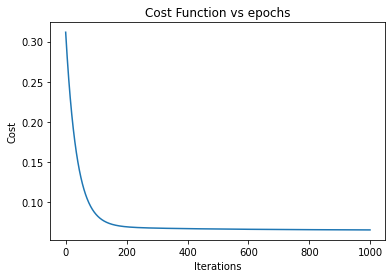

[0.55973224 0.07903617 0.29732128]


In [ ]:
plot_gd(costs_bgd)
print(w_bgd)

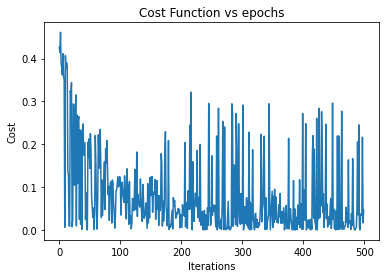

[0.56416136 0.14116527 0.25844081]


In [ ]:
plot_gd(costs_sgd)
print(w_sgd)

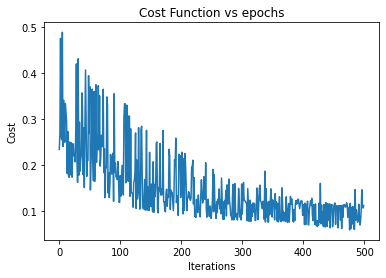

[0.42006939 0.17592262 0.11744113]


In [ ]:
plot_gd(costs_mbgd)
print(w_mbgd)

In [ ]:
'''
def contour_cost(X, y, w1, w2):


w1_vals = np.linspace(np.min(weights_bgd[:,1]), np.max(weights_bgd[:,1]), 50)
w2_vals = np.linspace(np.min(weights_bgd[:,2]), np.max(weights_bgd[:,2]), 50)

X,Y = np.meshgrid(w1_vals, w2_vals)
Z = cost()
'''

In [ ]:
'''
w1_vals = np.linspace(np.min(weights_bgd[:,1]), np.max(weights_bgd[:,1]), 50)
w2_vals = np.linspace(np.min(weights_bgd[:,2]), np.max(weights_bgd[:,2]), 50)
J_vals = np.zeros((len(w1_vals), len(w2_vals)))

c1=0; c2=0
for i in w1_vals:
    for j in w2_vals:
        t = np.array([0.55973224, i, j])
        J_vals[c1, c2] = cost(X, y, t)
        c2=c2+1
    c1=c1+1
    c2=0
'''

In [ ]:
'''
plt.contour(w1_vals, w2_vals, J_vals, levels = np.logspace(-2,3,100))
plt.xlabel('w1'); plt.ylabel("w2")
plt.title("BGD Contour plot of loss function for different values of w1 and w2");
plt.plot(w_bgd[1], w_bgd[2]);
'''